In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
import joblib
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import kagglehub

In [7]:
import kagglehub

path = kagglehub.dataset_download("ash2703/handsignimages")

print("Path to dataset files:", path)

Path to dataset files: /Users/nedday/.cache/kagglehub/datasets/ash2703/handsignimages/versions/2


In [8]:
# Alphabets disponibles dans le dataset
alphabet_array = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']

# Charger les images et leurs étiquettes
image_arr = []
image_name_value = []

# Taille cible pour toutes les images
target_size = (28, 28)

for letter in alphabet_array:
    path_letter = os.path.join(path, "Train", letter)
    if not os.path.exists(path_letter):
        print(f"Le dossier {path_letter} n'existe pas.")
        continue

    for image_name in os.listdir(path_letter):
        image_path = os.path.join(path_letter, image_name)
        image = plt.imread(image_path)

        if image is None:
            print(f"Erreur de lecture de l'image {image_path}")
            continue

        if image.ndim == 3:
            image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

        resized_image = cv2.resize(image, target_size)
        image_arr.append(resized_image.flatten())
        image_name_value.append(letter)

In [9]:
import os
print("Dataset directory structure:")
print(os.listdir(path))


Dataset directory structure:
['Test', 'Train']


In [10]:
# Convertir les listes en tableaux numpy
X = np.array(image_arr)
y = np.array(image_name_value)

In [12]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
model = LogisticRegression()
model.fit(X_train, y_train)

/Users/nedday/Documents/All Projects /ml-project/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [14]:
y_pred = model.predict(X_test)

In [15]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 94.81%


In [16]:
# Affichage du rapport de classification
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           A       0.99      0.99      0.99       209
           B       0.99      1.00      0.99       182
           C       0.98      1.00      0.99       250
           D       0.98      0.93      0.95       255
           E       0.99      0.97      0.98       183
           F       0.93      0.97      0.95       246
           G       0.98      0.93      0.95       213
           H       0.95      0.96      0.95       225
           I       0.92      0.95      0.94       220
           K       0.96      0.93      0.94       227
           L       0.97      0.93      0.95       249
           M       0.98      0.95      0.97       216
           N       0.97      0.96      0.97       236
           O       0.96      0.98      0.97       262
           P       0.98      0.96      0.97       219
           Q       0.94      0.98      0.96       235
           R       0.87      0.86      0.86       266
    

GridSearch 

In [17]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [19]:
param_grid = {
    'penalty': ['l1', 'l2'],  # Type de régularisation
    'C': [0.1, 1, 10],  # Paramètre de régularisation
    'solver': ['liblinear']  # Solver adapté pour L1 (en plus de L2)
}

In [20]:
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, n_jobs=-1, verbose=1)

In [ ]:
grid_search.fit(X_train, y_train)

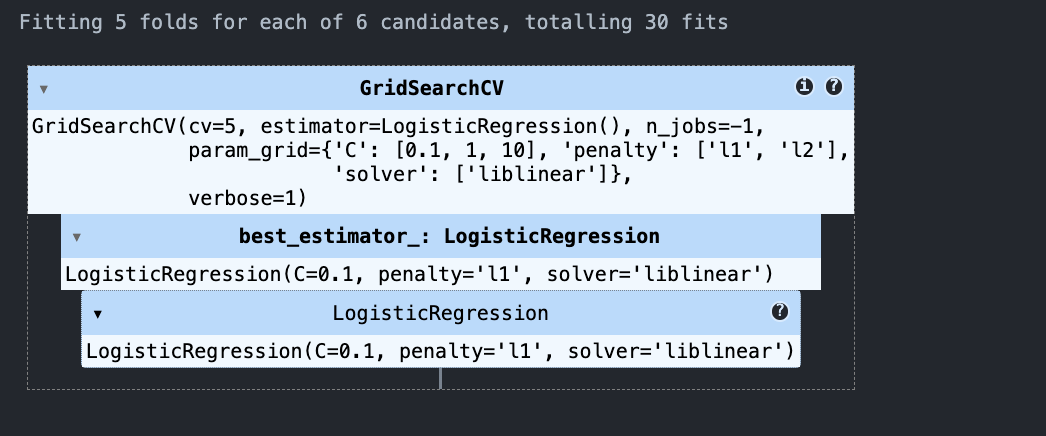

In [ ]:
# Résultats du GridSearch
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Meilleurs hyperparamètres : {best_params}")
print(f"Meilleure précision moyenne : {best_score:.4f}")

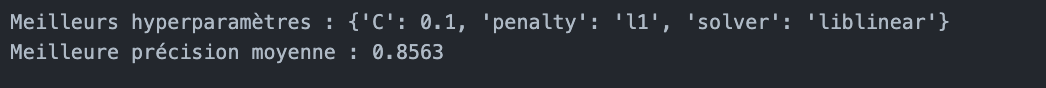

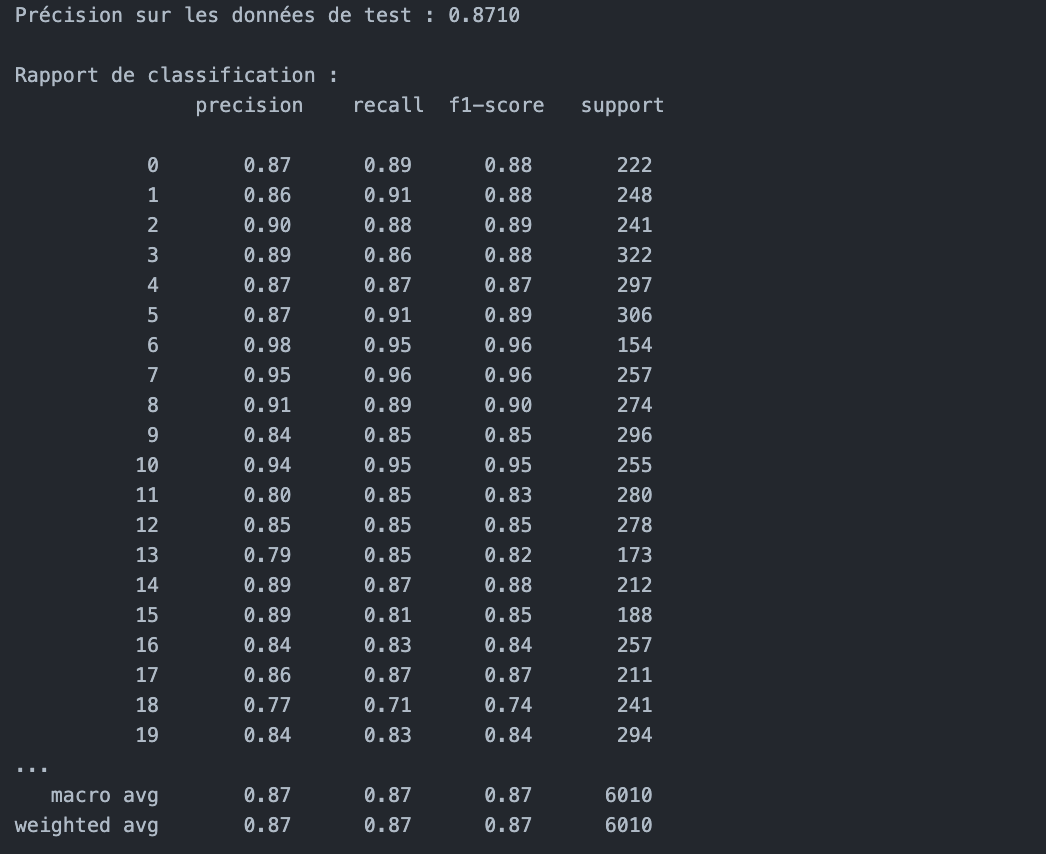